In [3]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
sns.set_style("darkgrid")

In [4]:
%cd /Users/Manre/Documents/code/va/documentation/data/youtube/

/Users/Manre/Documents/code/va/documentation/data/youtube


In [5]:
df = pd.read_csv("0.txt", sep="\t", header=None)

In [6]:
df.columns = ['name', 'uploader', 'age', 'category', 'length', 'views', 'rate', 'group', 'comments', 'related_video 1', 'related_video 2', 'related_video 3', 'related_video 4', 'related_video 5', 'related_video 6', 'related_video 7', 'related_video 8', 'related_video 9', 'related_video 10', 'related_video 11', 'related_video 12', 'related_video 13', 'related_video 14', 'related_video 15', 'related_video 16', 'related_video 17', 'related_video 18', 'related_video 19', 'related_video 20']

In [129]:
df['age'] = df['age'].fillna(742)
df['views'] = df['views'].fillna(0)
df['rate'] = df['rate'].fillna(0)
df['category'] = df['category'].fillna(0)
df['length'] = df['length'].fillna(0)

In [130]:
data = df[['length', 'age']]
data2 = df[['views', 'categories']]

In [131]:
df.age.value_counts()

747    138
748     40
746     19
742      6
745      4
743      2
744      1
dtype: int64

In [153]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [154]:
data = data.values
data2 = data2.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [160]:
from sklearn.cluster import KMeans
from numpy.random import RandomState
rng = RandomState(423) #42
grupo = 3
kmeans = KMeans(n_clusters=3, random_state=rng).fit(data)
kmeans2 = KMeans(n_clusters=2, random_state=rng).fit(data2)

In [161]:
import numpy as np
np.round(kmeans.cluster_centers_, decimals=2)

array([[ 325.89,  746.98],
       [ 582.96,  747.15],
       [  92.41,  746.57]])

In [162]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()

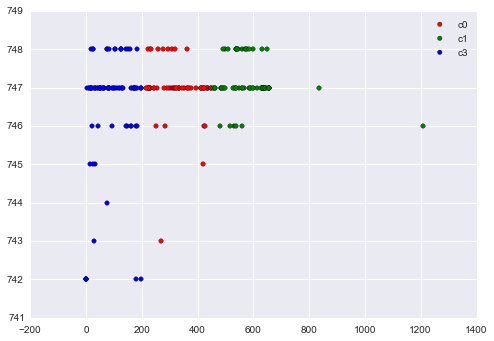

In [163]:
plot_2D(data, kmeans.labels_, ["c0", "c1", "c3"])

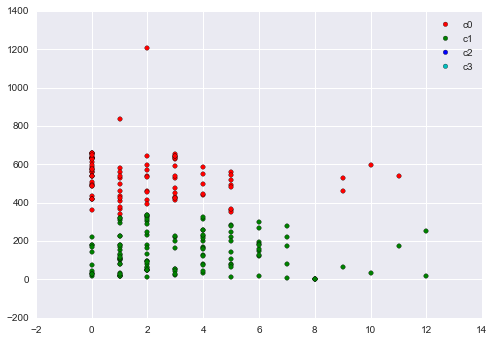

In [164]:
plot_2D(data2, kmeans2.labels_, ['c0','c1','c2','c3'])

#Parte 2

In [151]:
categories = df['category'].value_counts().index.values
tmp = {}
for i in range(len(categories)):
    tmp[categories[i]] = i
categories = tmp


# def obtainCategory

In [152]:
df['categories2'] = df['category'].map(lambda x: categories[x])

#Parte 3

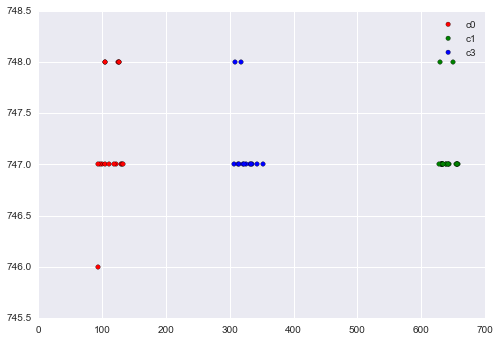

In [41]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=20).fit(data)

plot_2D(data, clustering.labels_, ["c0", "c1", "c3"])

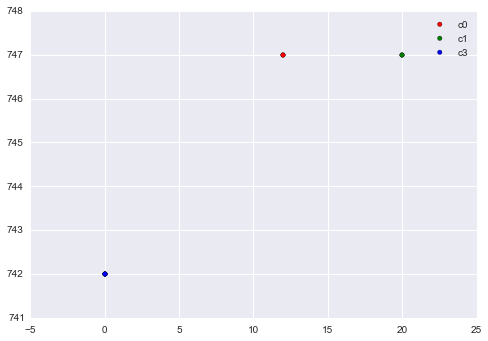

In [54]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

plot_2D(data, labels, ["c0", "c1", "c3"])

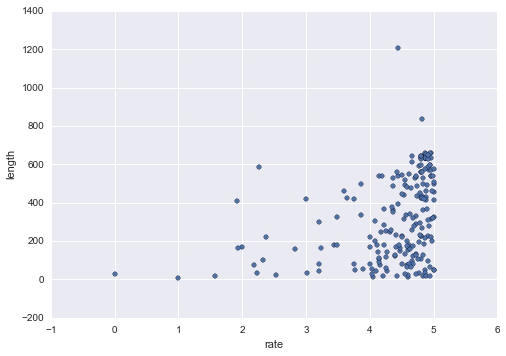

In [119]:
# 'age', 'category', 'length', 'views', 'rate', 'group', 'comments'
df.plot(x= 'rate', y='length', kind='scatter')